# From Data to a model

# Notebook 2 - (add theme here)

From now on we will import libraries that we already introduced in the first code cell of th notebook. In turn, this means you have to execute it in order for the rest to work properly

In [1]:
# Execute this cell to import all the libraries that we are going to use
# Once imported, you can then use them in every cell in this notebook. The same holds for 
# functions/classes you define or variables you declare (more on that mayne later) 


import matplotlib.pyplot as plt
# Settings for the figures
plt.style.use("https://github.com/comp-neural-circuits/intro-to-comp-neuro/raw/dev/plots_style.txt")
from ipywidgets import interact

# The Leaky Integrate and fire model

Today we will expand upon the class we developed in the last sessions and incorporate the new features we learned in the lecture.
As a reminder, here is the differential equation that describes the membrane potential of our neuron:

\begin{align}
\tau_m\,\frac{dV}{dt} &= - V + E_{L} + R_m\,I_e &\text{if }\quad V(t) \leq V_{th} \\ 
\\
V(t) &= V_{reset} &\text{otherwise}
\end{align}


where $V$ is the membrane potential, $\tau_m$ is the membrane time constant, $E_{L}$ is the leak potential, $R_m$ is the membrane resistance, $I_e$ is the synaptic input current, $V_{th}$ is the firing threshold, and $V_{reset}$ is the reset voltage.

The membrane equation describes the time evolution of membrane potential $V(t)$ in response to synaptic input and leaking of charge across the cell membrane. This is an *ordinary differential equation (ODE)*.

We first come back to the class of the LIF that we developed last time:

<details>
    <summary><font color="red"><b>click here to show/hide class code</b></font></summary>

```python
class LIFNeuron(object):
    """The first version of our LIF neuron class that can initiate a single neuron, 
    run the simulation for a certain number of steps while keeping track of the membrane voltage
    and plot the results of the run
    """
    def __init__(self, 
                 tau_m = 20, v_start = -50, el = -75, r_m = 100e6, v_reset = -70, v_th = -50,
                 I_e = 10e-8,
                 dt = 0.1):
        '''This function is executed when we create an object from that class'''
        super(LIFNeuron, self).__init__()
        self.tau_m = tau_m
        self.el = el
        self.dt = dt
        self.r_m = r_m
        self.v_reset = v_reset
        self.v_th = v_th
        
        self.v = v_start
        
        self.I_e = I_e
        
        self.v_list = [v_start]
        self.t_list = [0]
    
    def timestep(self):
        if self.v <= self.v_th:
            dv_dt = (-self.v + self.el)/self.tau_m + self.r_m * self.I_e
            self.v += dv_dt * self.dt
        else:
            self.v = self.v_reset
            
    
    def run_simulation(self, time_steps = 100):
        
        for ii in range(time_steps):
            self.timestep()
            
            self.v_list.append(self.v)
            current_time = self.t_list[-1] + self.dt
            self.t_list.append(current_time) 
            
    def plot_traces(self):
        
        plt.figure()
        plt.title('Time evolution of membrane voltage')

        plt.plot(self.t_list,self.v_list,linewidth=2.5)

        plt.xlabel('Time in ms')
        plt.ylabel('Voltage in mV')

        plt.ylim([-80,20])
        plt.show()
```

</details>

We now want to have a look at the different integration methods. We have seen two in the lecture: 

The euler method and Runge Kutta 4. 

We already use the euler method and now want to add the ability to run our simulation either with the euler or the Runge Kutta 4 method. 
There are manz solutions to this problem. 
One possible way is to add two new methods to the class:
```python
    def dv_dt_euler( 
```

<details>
    <summary><font color="blue"><b>Runge Kutta 4</b></font></summary>

$S\left(t_{i+1}\right) = S\left(t_i\right) + \frac{h}{6}\left(k_1 + 2\,k_2 + 2\, k_3 + k_4\right)$
<details>
 
test 
<details>
    <summary><font color="blue"><b>Euler</b></font></summary>

$S\left(t_{i+1}\right) = S\left(t_i\right) + \frac{h}{6}\left(k_1 + 2\,k_2 + 2\, k_3 + k_4\right)$
<details>

In [2]:
class LIFNeuron(object):
    """The first version of our LIF neuron class that can initiate a single neuron, 
    run the simulation for a certain number of steps while keeping track of the membrane voltage
    and plot the results of the run
    """
    def __init__(self, 
                 tau_m = 20, v_start = -50, el = -75, r_m = 100e6, v_reset = -70, v_th = -50,
                 I_e = 10e-8,
                 dt = 0.1,
                 integration_method = 'euler'):
        '''This function is executed when we create an object from that class'''
        super(LIFNeuron, self).__init__()
        self.tau_m = tau_m
        self.el = el
        self.dt = dt
        self.r_m = r_m
        self.v_reset = v_reset
        self.v_th = v_th

        self.v = v_start

        self.I_e = I_e

        self.v_list = [v_start]
        self.t_list = [0]
        
        self.integration_method = integration_method

    
    def dv_dt(self, v):
        return (-v + self.el)/self.tau_m + self.r_m * self.I_e
        
    def timestep(self):
        if self.v <= self.v_th:
            if self.integration_method == 'euler':
                dv_dt = self.dv_dt_euler()
            if self.integration_method == 'runge_kutta_4':
                dv_dt = self.dv_dt_runge_kutta_4()
            self.v += dv_dt * self.dt
        else:
            self.v = self.v_reset


    def run_simulation(self, time_steps = 100):

        for ii in range(time_steps):
            self.timestep()

            self.v_list.append(self.v)
            current_time = self.t_list[-1] + self.dt
            self.t_list.append(current_time) 

    def plot_traces(self):

        plt.figure()
        plt.title('Time evolution of membrane voltage')

        plt.plot(self.t_list,self.v_list,linewidth=2.5)

        plt.xlabel('Time in ms')
        plt.ylabel('Voltage in mV')

        plt.ylim([-80,20])
        plt.show()
        

test = LIFNeuron(I_e = 0, method='euler')

test.run_simulation(1000)
test.I_e = 4e-9
test.run_simulation(1000)
test.I_e = 0
test.run_simulation(1000)
test.I_e = 2e-8
test.run_simulation(1000)
test.plot_traces()

### Defining Parameters 

We first define the parameters we need in order to simulate our neuron model. In order to define and print the parameters below, you need to 'comment out' the code first before you run the cell

In [25]:
t_max = 150e-3   # second
tau_m = 20e-3      # second
el = -60e-3      # milivolt
vr = -70e-3      # milivolt
vth = -50e-3     # milivolt
r = 100e6        # ohm
i_mean = 25e-11  # ampere

# print(t_max, tau_m, el, vr, vth, r, i_mean)

After executing the cell above, you should see all defined parameters printed. You might have noted that we use variable names that correspond to the names in the math notation. We also use comments behing the variables, to indicate what unit we used for those numbers.

As a reminder
```python
25e-11
```
is the same as 25*10^(-11)

### Implementation

In the next exercises, we will simulate the evolution of the membrane equation in discrete time steps, with a sufficiently small $\Delta t$.

We start by writing the time derivative $d/dt\,V(t)$ in the membrane equation without taking the limit $\Delta t \to 0$:

\begin{equation}
\tau_m\,\frac{V\left(t+\Delta t\right)-V\left(t\right)}{\Delta t} = E_{L} - V(t) + R\,I(t) \qquad \qquad (1)
\end{equation}

The value of membrane potential $V\left(t+\Delta t\right)$ can be expressed in terms of its previous value $V(t)$ by simple algebraic manipulation. For *small enough* values of $\Delta t$, this provides a good approximation of the continuous-time integration.

This operation is an integration since we obtain a sequence $\{V(t), V(t+\Delta t), V(t+2\Delta t),...\}$ starting from the ODE. Notice how the ODE describes the evolution of $\frac{d}{dt}\,V(t)$, the derivative of $V(t)$, but not directly the evolution of $V(t)$. For the evolution of $V(t)$ we need to integrate the ODE, and in this tutorial, we will do a discrete-time integration using the Euler method. See [Numerical methods for ordinary differential equations](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) for additional details.

We need to reorganize the Eq. (1) to isolate $V\left(t+\Delta t\right)$ on the left side, and express it as function of $V(t)$ and the other terms:

\begin{equation}
V(t + \Delta t) =  V(t) + \frac{\Delta t}{\tau_m}(E_l -V(t) + R I(t)) \qquad \qquad (2)
\end{equation}

#### Excercise

In [ ]:
'''
We now want to define the function shown in 2.
We need it to take the parameters v_t, dt and It 
The other paramters will not change.
We defined them already above - now we can re-use them.

Finish the implementation below, when you are done, execute the cell, the output should be:

9.4976

'''

def v_dt (v_t, i_t, dt):
    v_dt = v_t + dt/tau_m *(el-v_t + r*i_t)
    return v_dt


print (v_dt(v_t = 10, i_t = 12e-11, dt = 1e-3))

In [ ]:
fig, ax = plt.subplots()
ax.plot([0,1],[0.2,0.8])
ax.plot([0,1],[-0.2,-0.8])
ax.set(
    xlabel='X Label',
    ylabel='Y Label',
    title='Title')

Ran for 1.0s in 10 steps.


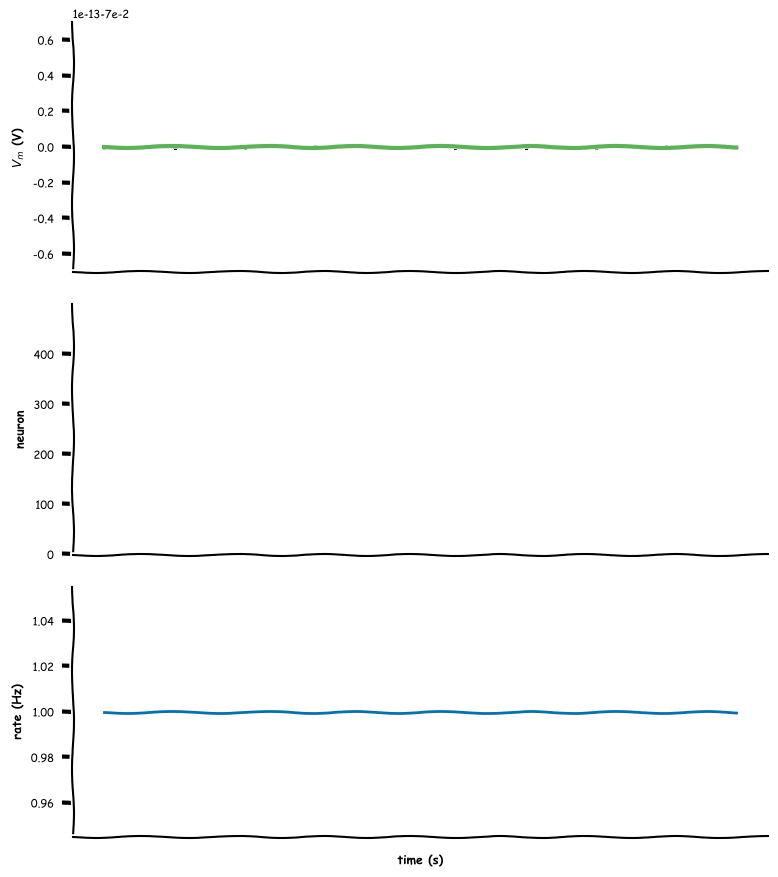

In [36]:
# Simulation class
class LIFNeurons:
    """
    Keeps track of membrane potential for multiple realizations of LIF neuron,
    and performs single step discrete time integration.
    """
    def __init__(self, n, t_ref_mu=0.01, t_ref_sigma=0.002,
               tau=20e-3, el=-60e-3, vr=-70e-3, vth=-50e-3, r=100e6):

        # Neuron count
        self.n = n

        # Neuron parameters
        self.tau = tau        # second
        self.el = el          # milivolt
        self.vr = vr          # milivolt
        self.vth = vth        # milivolt
        self.r = r            # ohm

        # Initializes refractory period distribution
        self.t_ref_mu = t_ref_mu
        self.t_ref_sigma = t_ref_sigma
        self.t_ref = self.t_ref_mu + self.t_ref_sigma * np.random.normal(size=self.n)
        self.t_ref[self.t_ref<0] = 0

        # State variables
        self.v = self.el * np.ones(self.n)
        self.spiked = self.v >= self.vth
        self.last_spike = -self.t_ref * np.ones([self.n])
        self.t = 0.
        self.steps = 0


    def ode_step(self, dt, i):
        """
        perform a single update step
        """

        # Update running time and steps
        self.t += dt
        self.steps += 1

        # One step of discrete time integration of dt
        self.v = self.v + dt / self.tau * (self.el - self.v + self.r * i)

        # Spike and clamp
        self.spiked = (self.v >= self.vth)
        self.v[self.spiked] = self.vr
        self.last_spike[self.spiked] = self.t
        clamped = (self.t_ref > self.t-self.last_spike)
        self.v[clamped] = self.vr

        self.last_spike[self.spiked] = self.t


t_max = 1
dt = 0.1
i_mean = 25e-11
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 500
v_n = np.ones([n, step_end])
i = i_mean * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i[:,step])

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
with plt.xkcd():
  plot_all(t_range, v_n, raster)

In [34]:
def plot_all(t_range, v, raster=None, spikes=None, spikes_mean=None):
  """
  Plots Time evolution for
  (1) multiple realizations of membrane potential
  (2) spikes
  (3) mean spike rate (optional)

  Args:
    t_range (numpy array of floats)
        range of time steps for the plots of shape (time steps)

    v (numpy array of floats)
        membrane potential values of shape (neurons, time steps)

    raster (numpy array of floats)
        spike raster of shape (neurons, time steps)

    spikes (dictionary of lists)
        list with spike times indexed by neuron number

    spikes_mean (numpy array of floats)
        Mean spike rate for spikes as dictionary

  Returns:
    Nothing.
  """

  v_mean = np.mean(v, axis=0)
  fig_w, fig_h = plt.rcParams['figure.figsize']
  plt.figure(figsize=(fig_w, 1.5 * fig_h))

  ax1 = plt.subplot(3, 1, 1)
  for j in range(n):
    plt.scatter(t_range, v[j], color="k", marker=".", alpha=0.01)
  plt.plot(t_range, v_mean, 'C1', alpha=0.8, linewidth=3)
  plt.xticks([])
  plt.ylabel(r'$V_m$ (V)')

  if raster is not None:
    plt.subplot(3, 1, 2)
    spikes_mean = np.mean(raster, axis=0)
    plt.imshow(raster, cmap='Greys', origin='lower', aspect='auto')

  else:
    plt.subplot(3, 1, 2, sharex=ax1)
    for j in range(n):
      times = np.array(spikes[j])
      plt.scatter(times, j * np.ones_like(times), color="r", marker=".", alpha=0.2)

  plt.xticks([])
  plt.ylabel('neuron')

  if spikes_mean is not None:
    plt.subplot(3, 1, 3, sharex=ax1)
    plt.plot(t_range, spikes_mean)
    plt.xlabel('time (s)')
    plt.ylabel('rate (Hz)')

  plt.tight_layout()
  plt.show()

Ran for 0.1s in 100 steps.


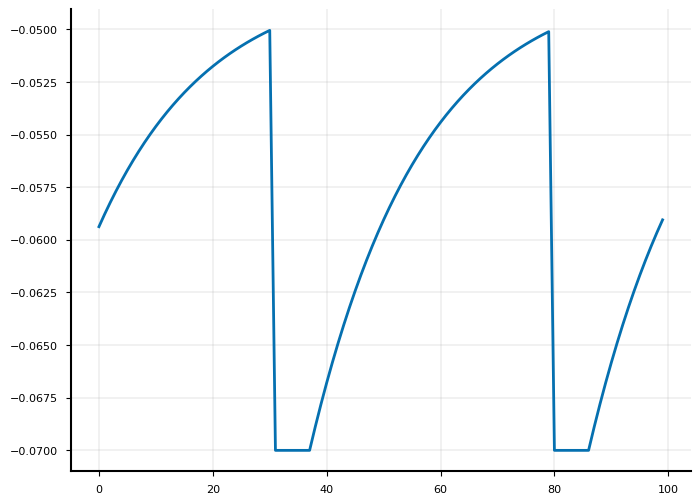

In [59]:
t_max = 0.1
dt = 0.001
i_mean = 25e-11/2
# Set random number generator
np.random.seed(2020)

# Initialize step_end, t_range, n, v_n and i
t_range = np.arange(0, t_max, dt)
step_end = len(t_range)
n = 1
v_n = np.ones([n, step_end])
i = i_mean #/7. * (1 + 0.1 * (t_max / dt)**(0.5) * (2 * np.random.random([n, step_end]) - 1))

# Initialize binary numpy array for raster plot
raster = np.zeros([n,step_end])

# Initialize neurons
neurons = LIFNeurons(n)

# Loop over time steps
for step, t in enumerate(t_range):

  # Call ode_step method
  neurons.ode_step(dt, i)

  # Log v_n and spike history
  v_n[:,step] = neurons.v
  raster[neurons.spiked, step] = 1.

# Report running time and steps
print(f'Ran for {neurons.t:.3}s in {neurons.steps} steps.')

# Plot multiple realizations of Vm, spikes and mean spike rate
plt.figure();
plt.plot(v_n[0])